# K Means

This example will show how to apply k means under the assumption that we know the amount of clusters

In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Generate Data
cluster_1 = np.random.normal(loc=(-3,8),
                             scale=10,
                             size=(1000,2))
cluster_2 = np.random.normal(loc=(-5,-5),
                             scale=10,
                             size=(1000,2))
cluster_3 = np.random.normal(loc=(10,-5),
                             scale=10,
                             size=(1000,2))

cluster_list = [cluster_1, cluster_2, cluster_3]
points = np.concatenate([cluster_1, cluster_2, cluster_3])

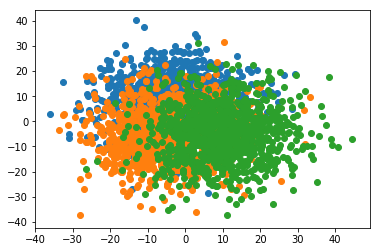

In [25]:
def plt_points(cluster_list):
    for cluster in cluster_list:
        plt.scatter(cluster[:, 0], cluster[:, 1])

plt_points(cluster_list)

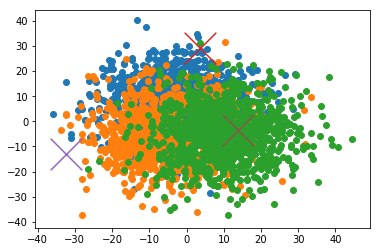

In [26]:
# Init nodes
n_nodes = 3
max_x = max(points[:, 0])
max_y = max(points[:, 1])
min_x = min(points[:, 0])
min_y = min(points[:, 1])

orig_nodes = [[random.uniform(min_x, max_x), random.uniform(min_y, max_y)]for _ in range(n_nodes)]
orig_nodes = np.array(orig_nodes)

def plt_nodes(node_list):
    for node in node_list:
        plt.scatter(*node, marker='x', s=1000)

plt_points(cluster_list)
plt_nodes(orig_nodes)

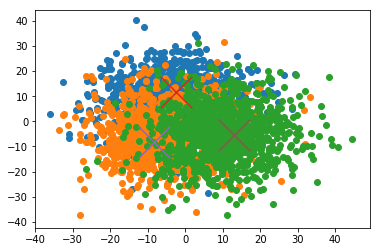

In [27]:
# Now let's try to find the 3 clusters, but first calculate some helper functions
def find_nn(points, center, k):
    # Calcualte the distance between each point and center
    distance = np.linalg.norm(points-center, axis=1)
    # Get k nearest points
    sort_idx = np.argsort(distance)
    nearest_points = points[sort_idx, :][:k, :]
    
    return nearest_points

def find_nearest_cluster(points, centers):
    # Calcualte the distance between each point and centets
    distance_matrix = np.zeros((points.shape[0], centers.shape[0]))
    
    for idx, center in enumerate(centers):
        distance_matrix[:, idx] = np.linalg.norm(points-center, axis=1)
    # Get k nearest points
    cluster_idx = np.argmin(distance_matrix, axis=1)

    return cluster_idx

def calculate_update_average(nearest_points, center):
    if nearest_points.size:
        return np.average(nearest_points, axis=0)
    else:
        return center


nodes = copy.copy(orig_nodes)
n_iterations = 100

for idx in range(n_iterations):
    
    cluster_idx = find_nearest_cluster(points, nodes)
    for node_idx, node in enumerate(nodes):
        nodes[node_idx] = calculate_update_average(points[cluster_idx == node_idx, :], node)

plt_points(cluster_list)
plt_nodes(nodes) 

In [15]:
np.average(points, axis=0)

array([-0.21828759,  1.4798052 ])

In [23]:
for c, o in zip(nodes, orig_nodes):
    print(c, o)

[-2.14275643 11.50753728] [-4.76451437 31.66825205]
[-6.00132561 -7.56160711] [-5.90193266 29.86843588]
[99.92180714 -5.01270312] [91.49926664 15.6133556 ]
